In [100]:
#Importing the required libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib as mt
%matplotlib inline 
#we dont need to write plt.show(), the graphs will show here it self

In [101]:
#Importing the dataset
df = pd.read_excel('Datasets/Flight/Data_Train.xlsx')

In [102]:
df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [103]:
df.shape

(10683, 11)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [105]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [106]:
df.dropna(inplace = True)

# Exploratory Data Analysis

In [107]:
mt.rcParams['figure.figsize'] = (24,12)

### Categorical Data

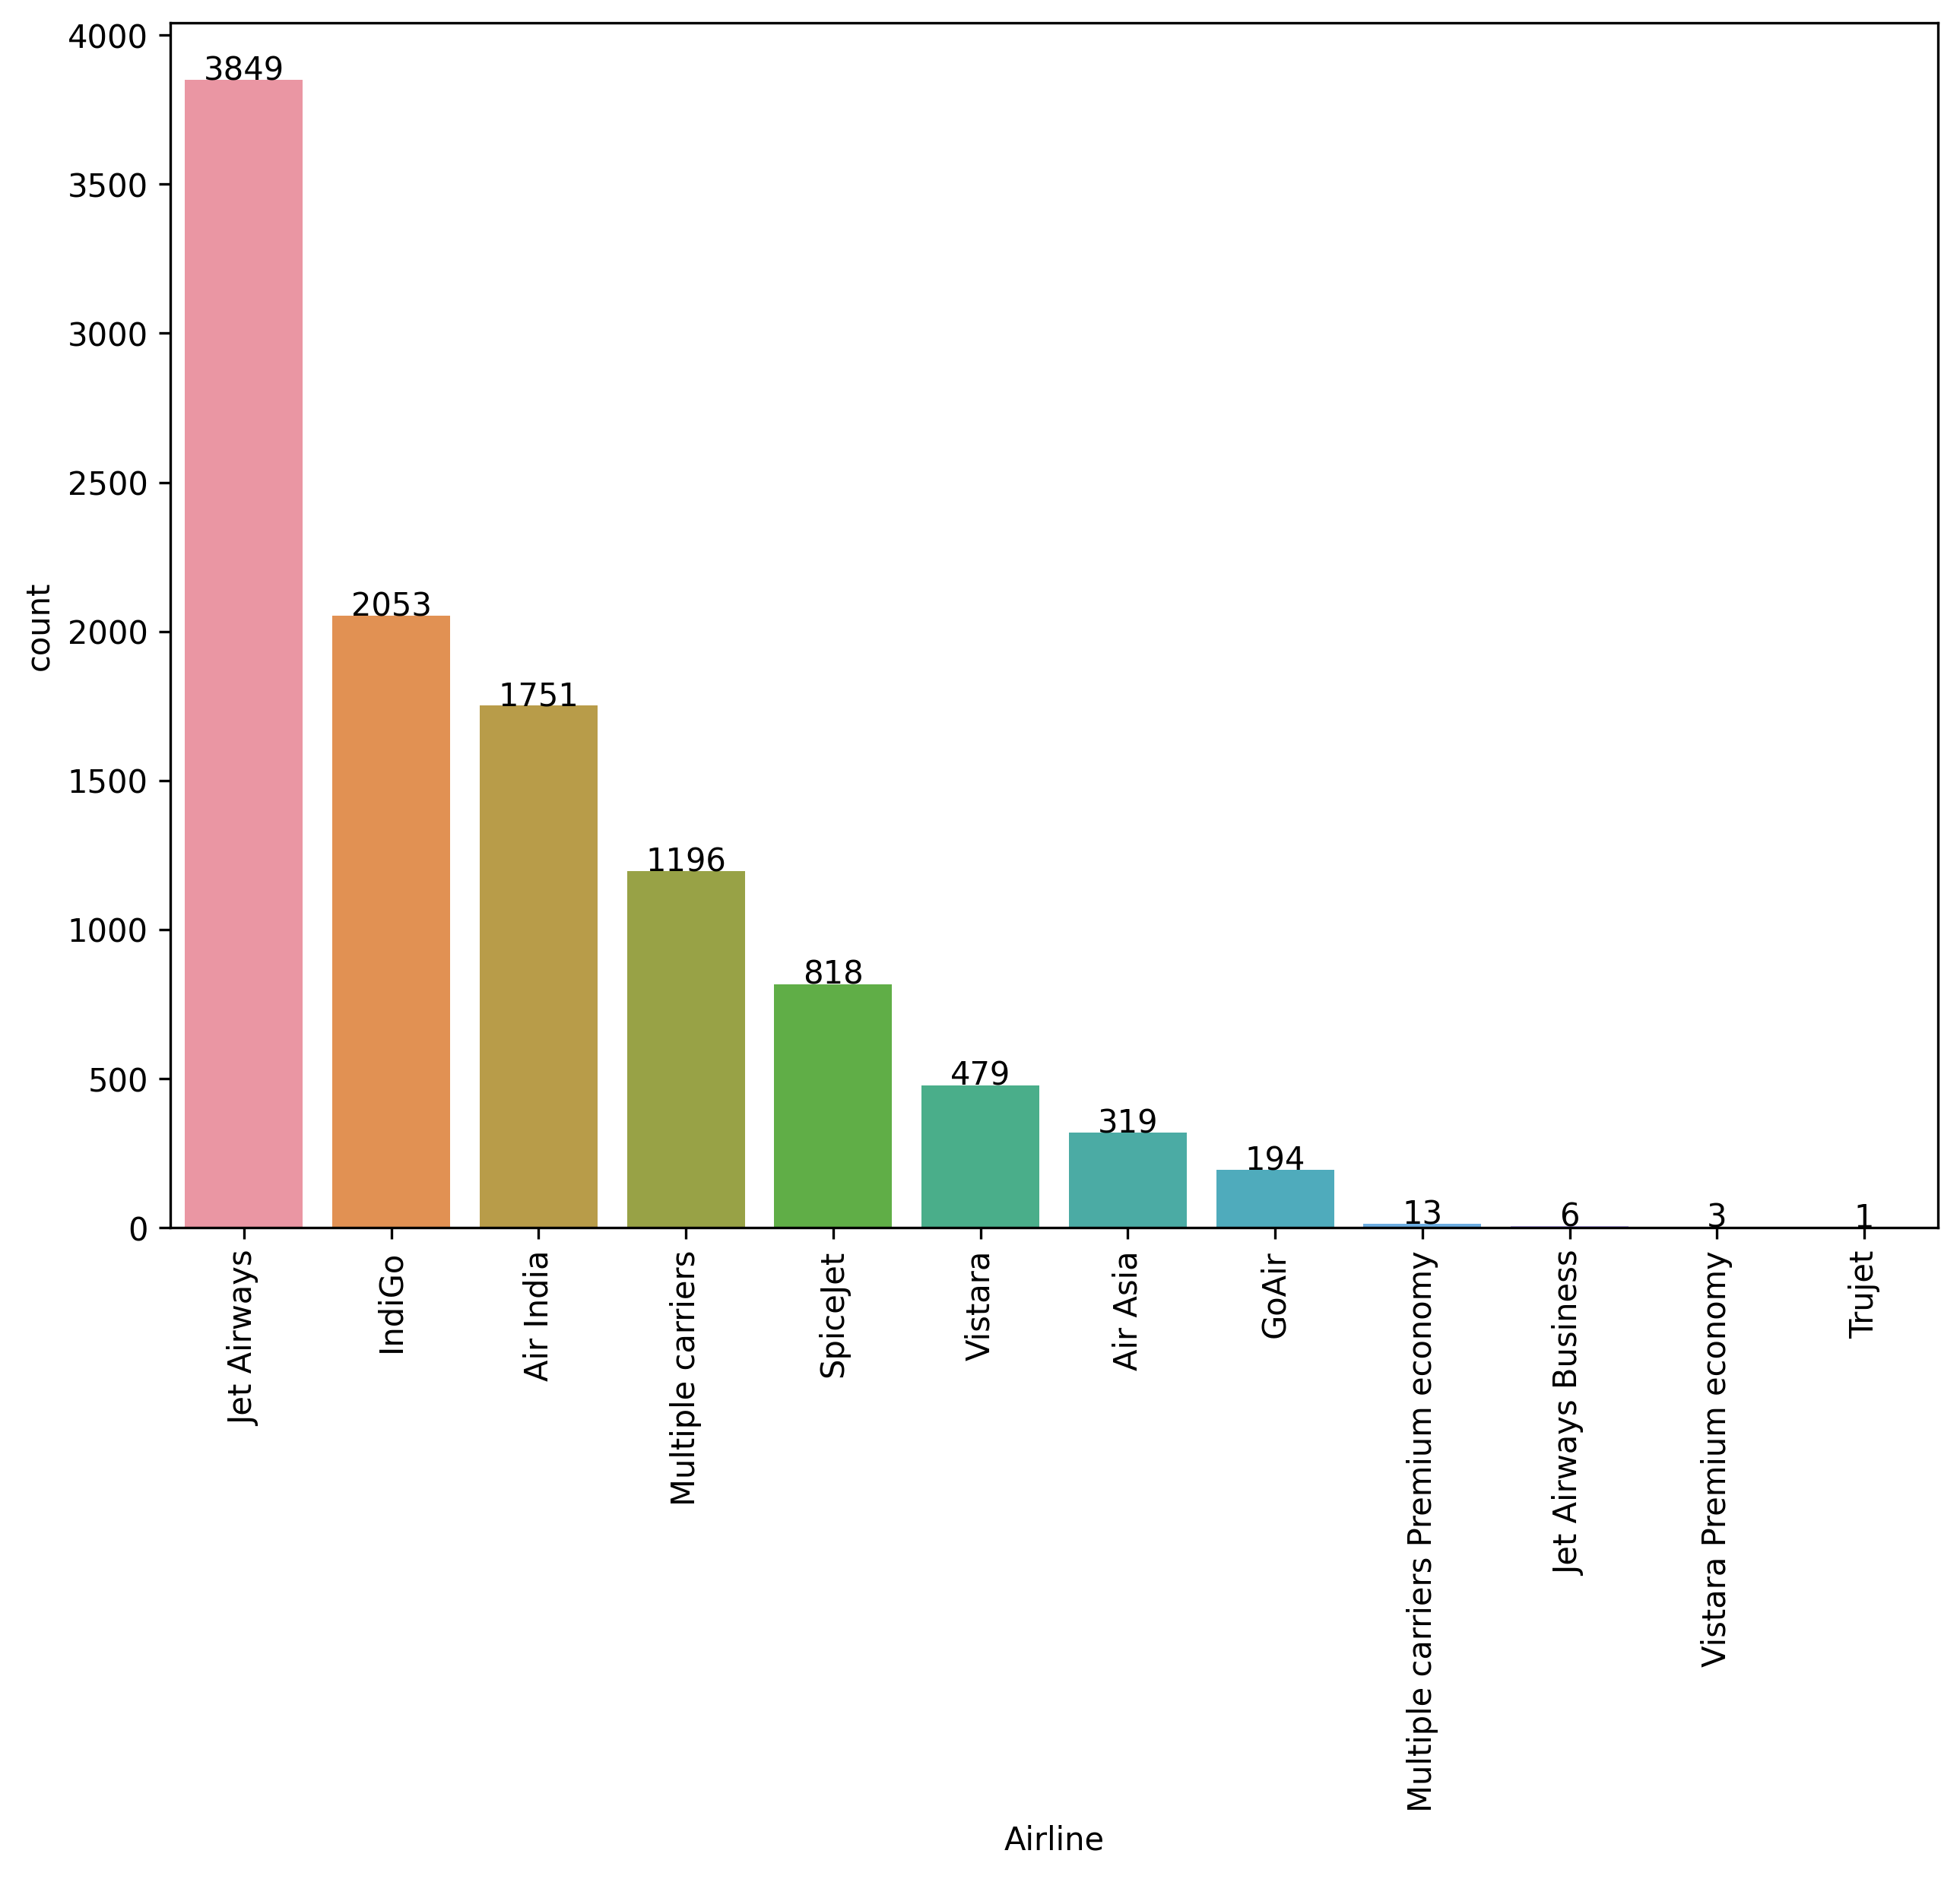

In [108]:
fig = plt.figure(figsize = (10,7), dpi = 300)
ax = sns.countplot(x = df['Airline'],data = df, order = df['Airline'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
for rect in ax.patches:ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 10)
plt.show()

In [109]:
def countplot(x):
    ax=sns.countplot(x=df[x],data=df,order=df[x].value_counts().index)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    for rect in ax.patches:
        ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 10)

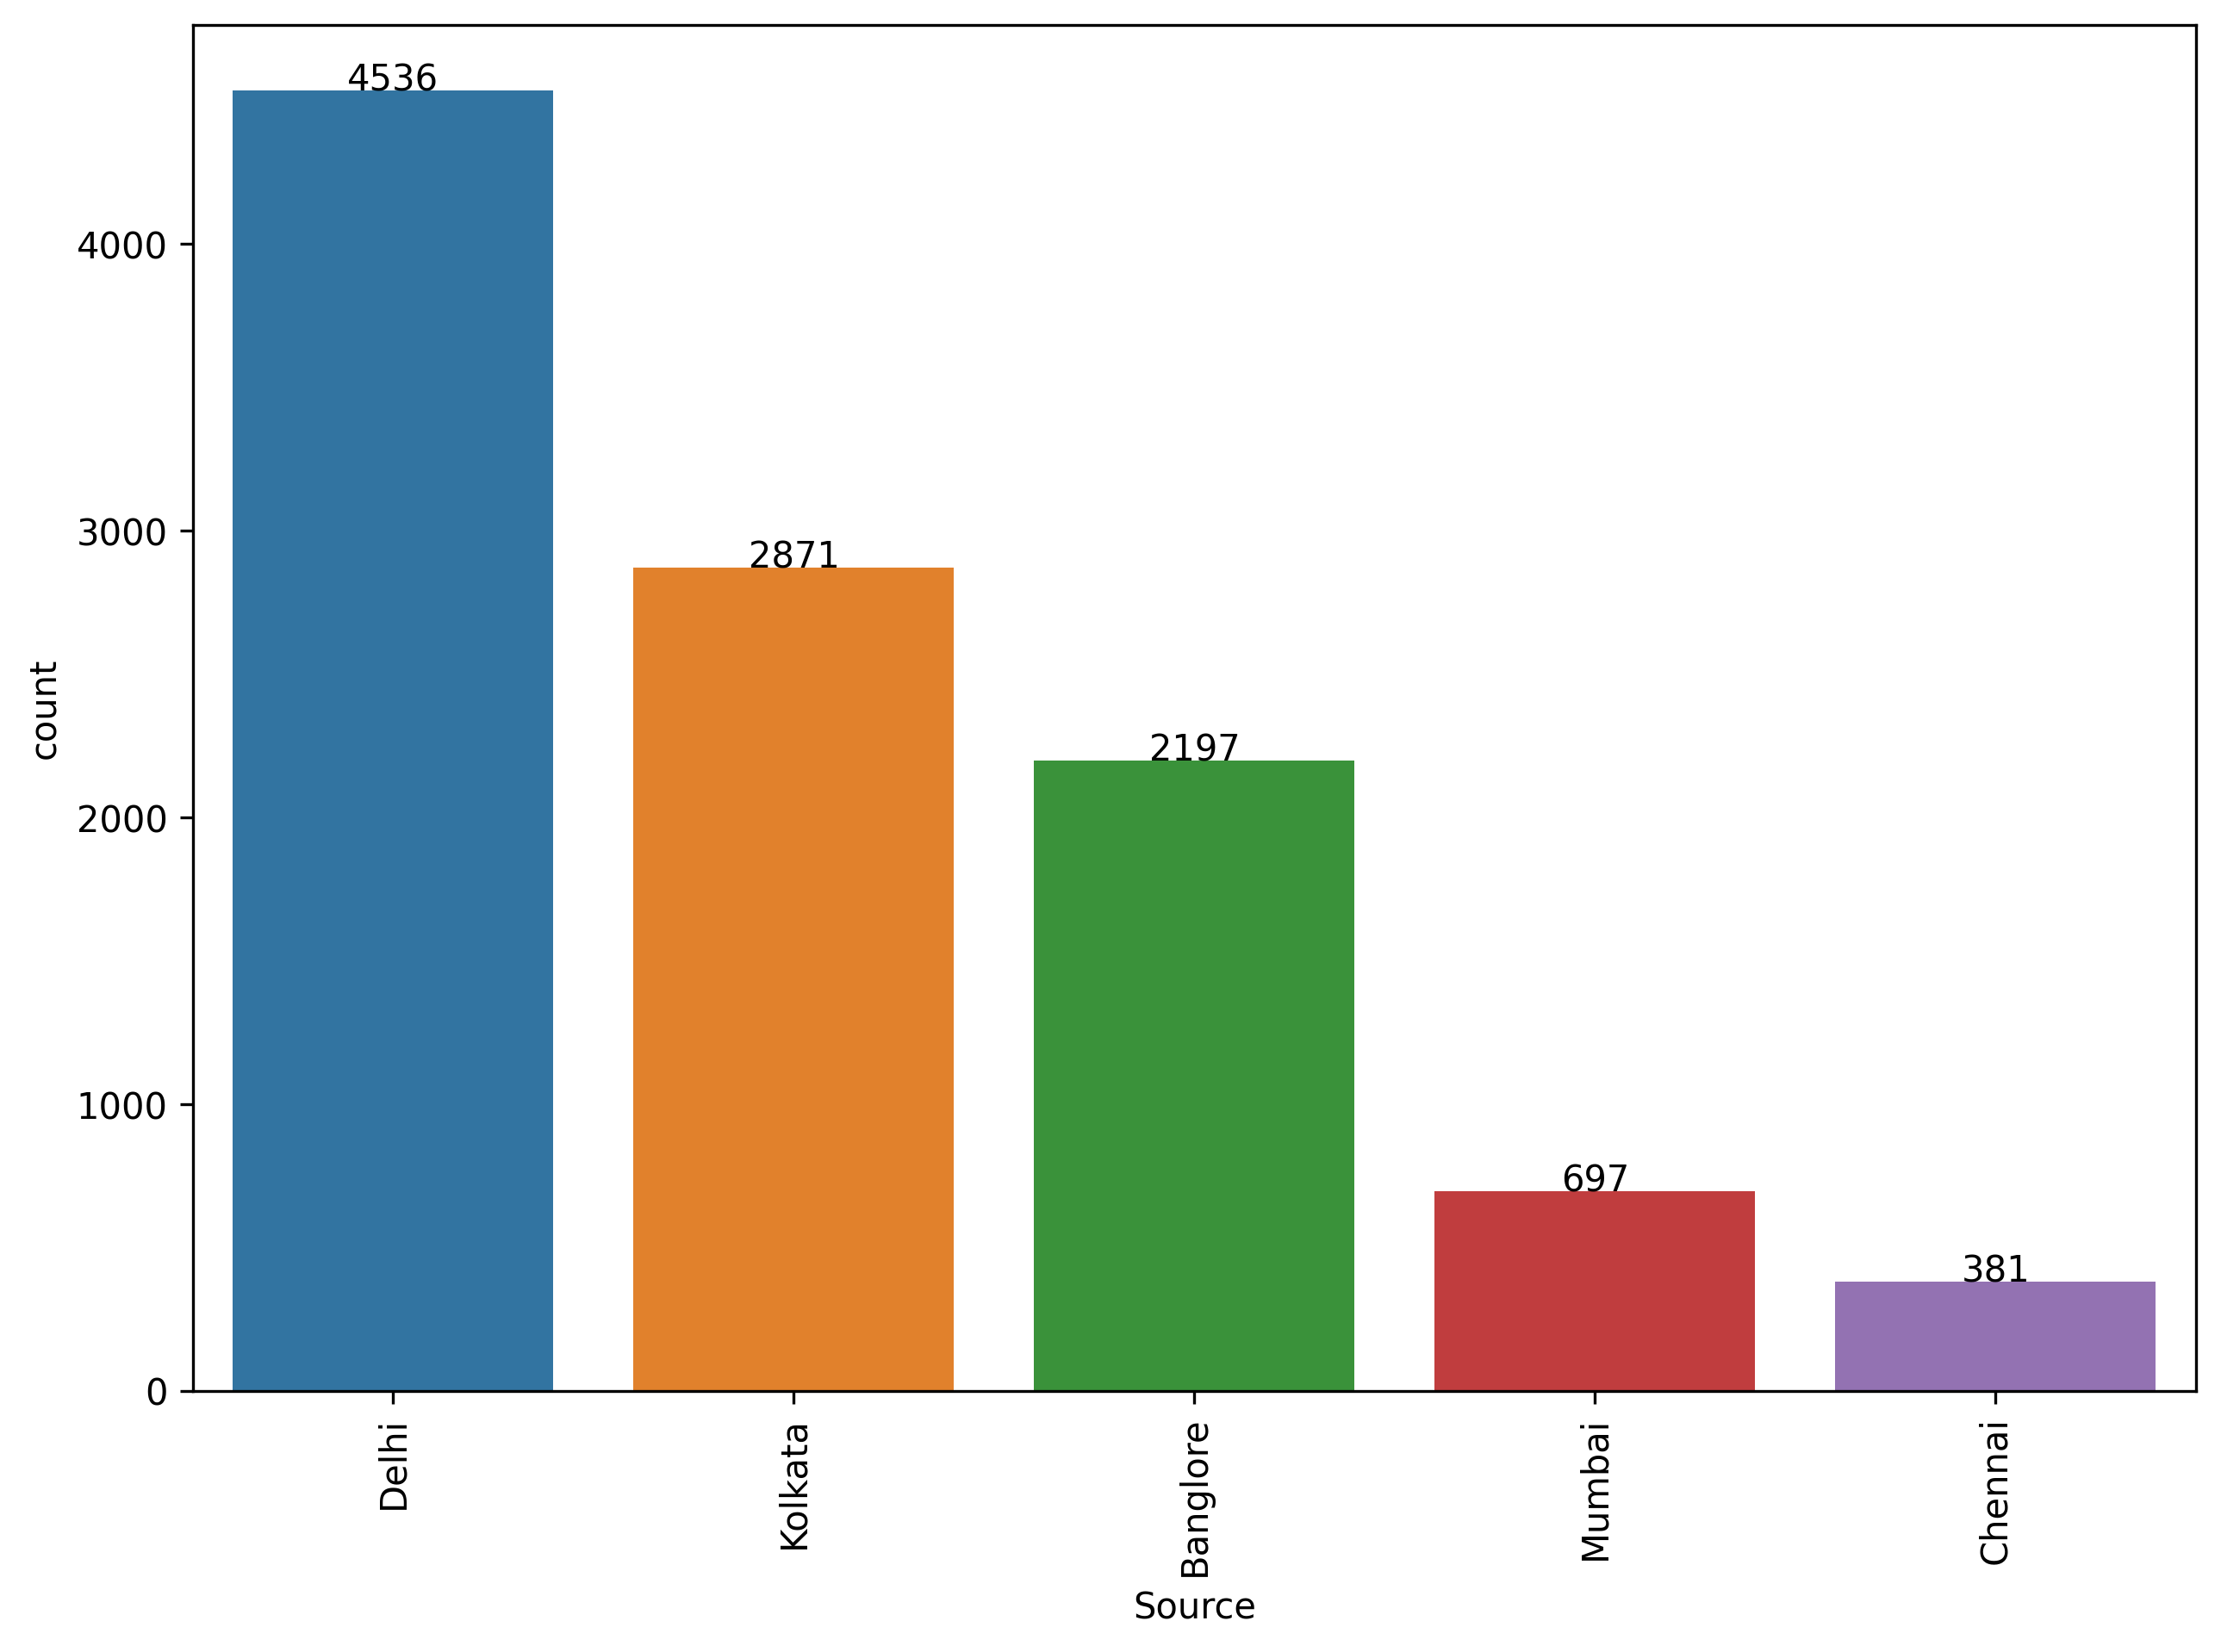

In [110]:
fig = plt.figure(figsize = (10,7), dpi = 300)
countplot('Source')

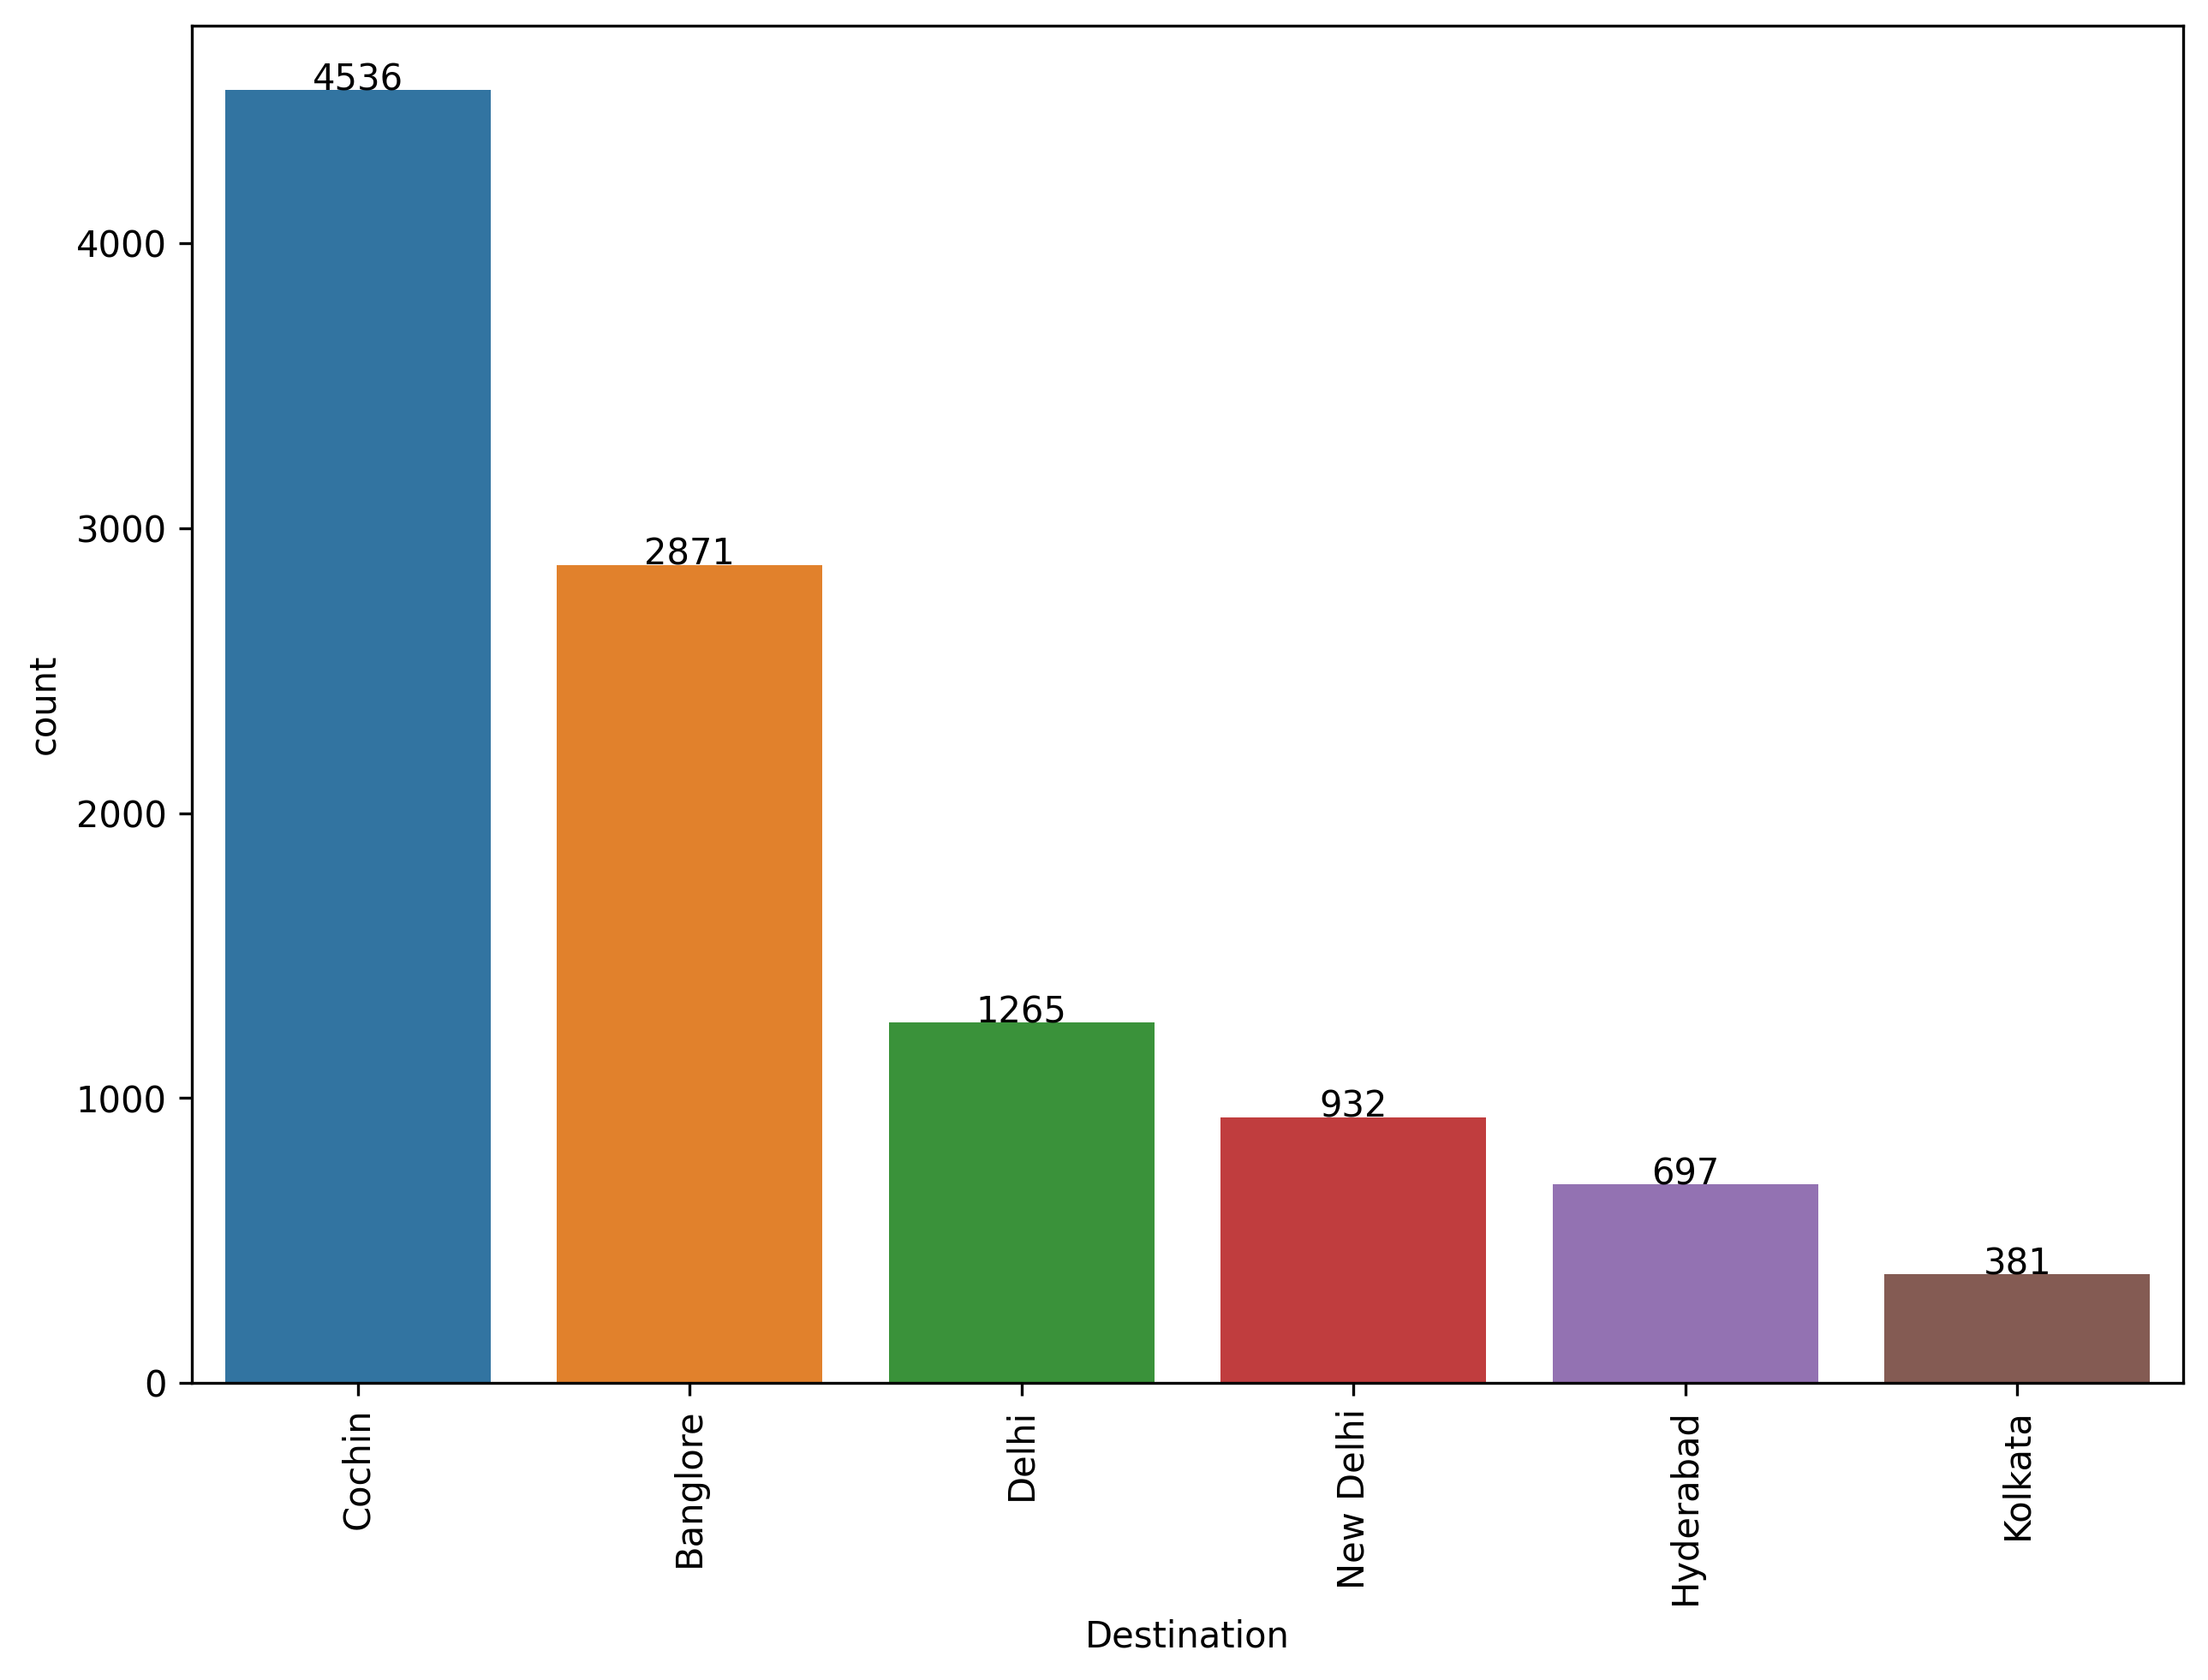

In [111]:
fig = plt.figure(figsize = (10,7), dpi = 300)
countplot('Destination')

In [112]:
def countplot_hue(x):
    ax=sns.countplot(x=x,data=df,hue='Total_Stops')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

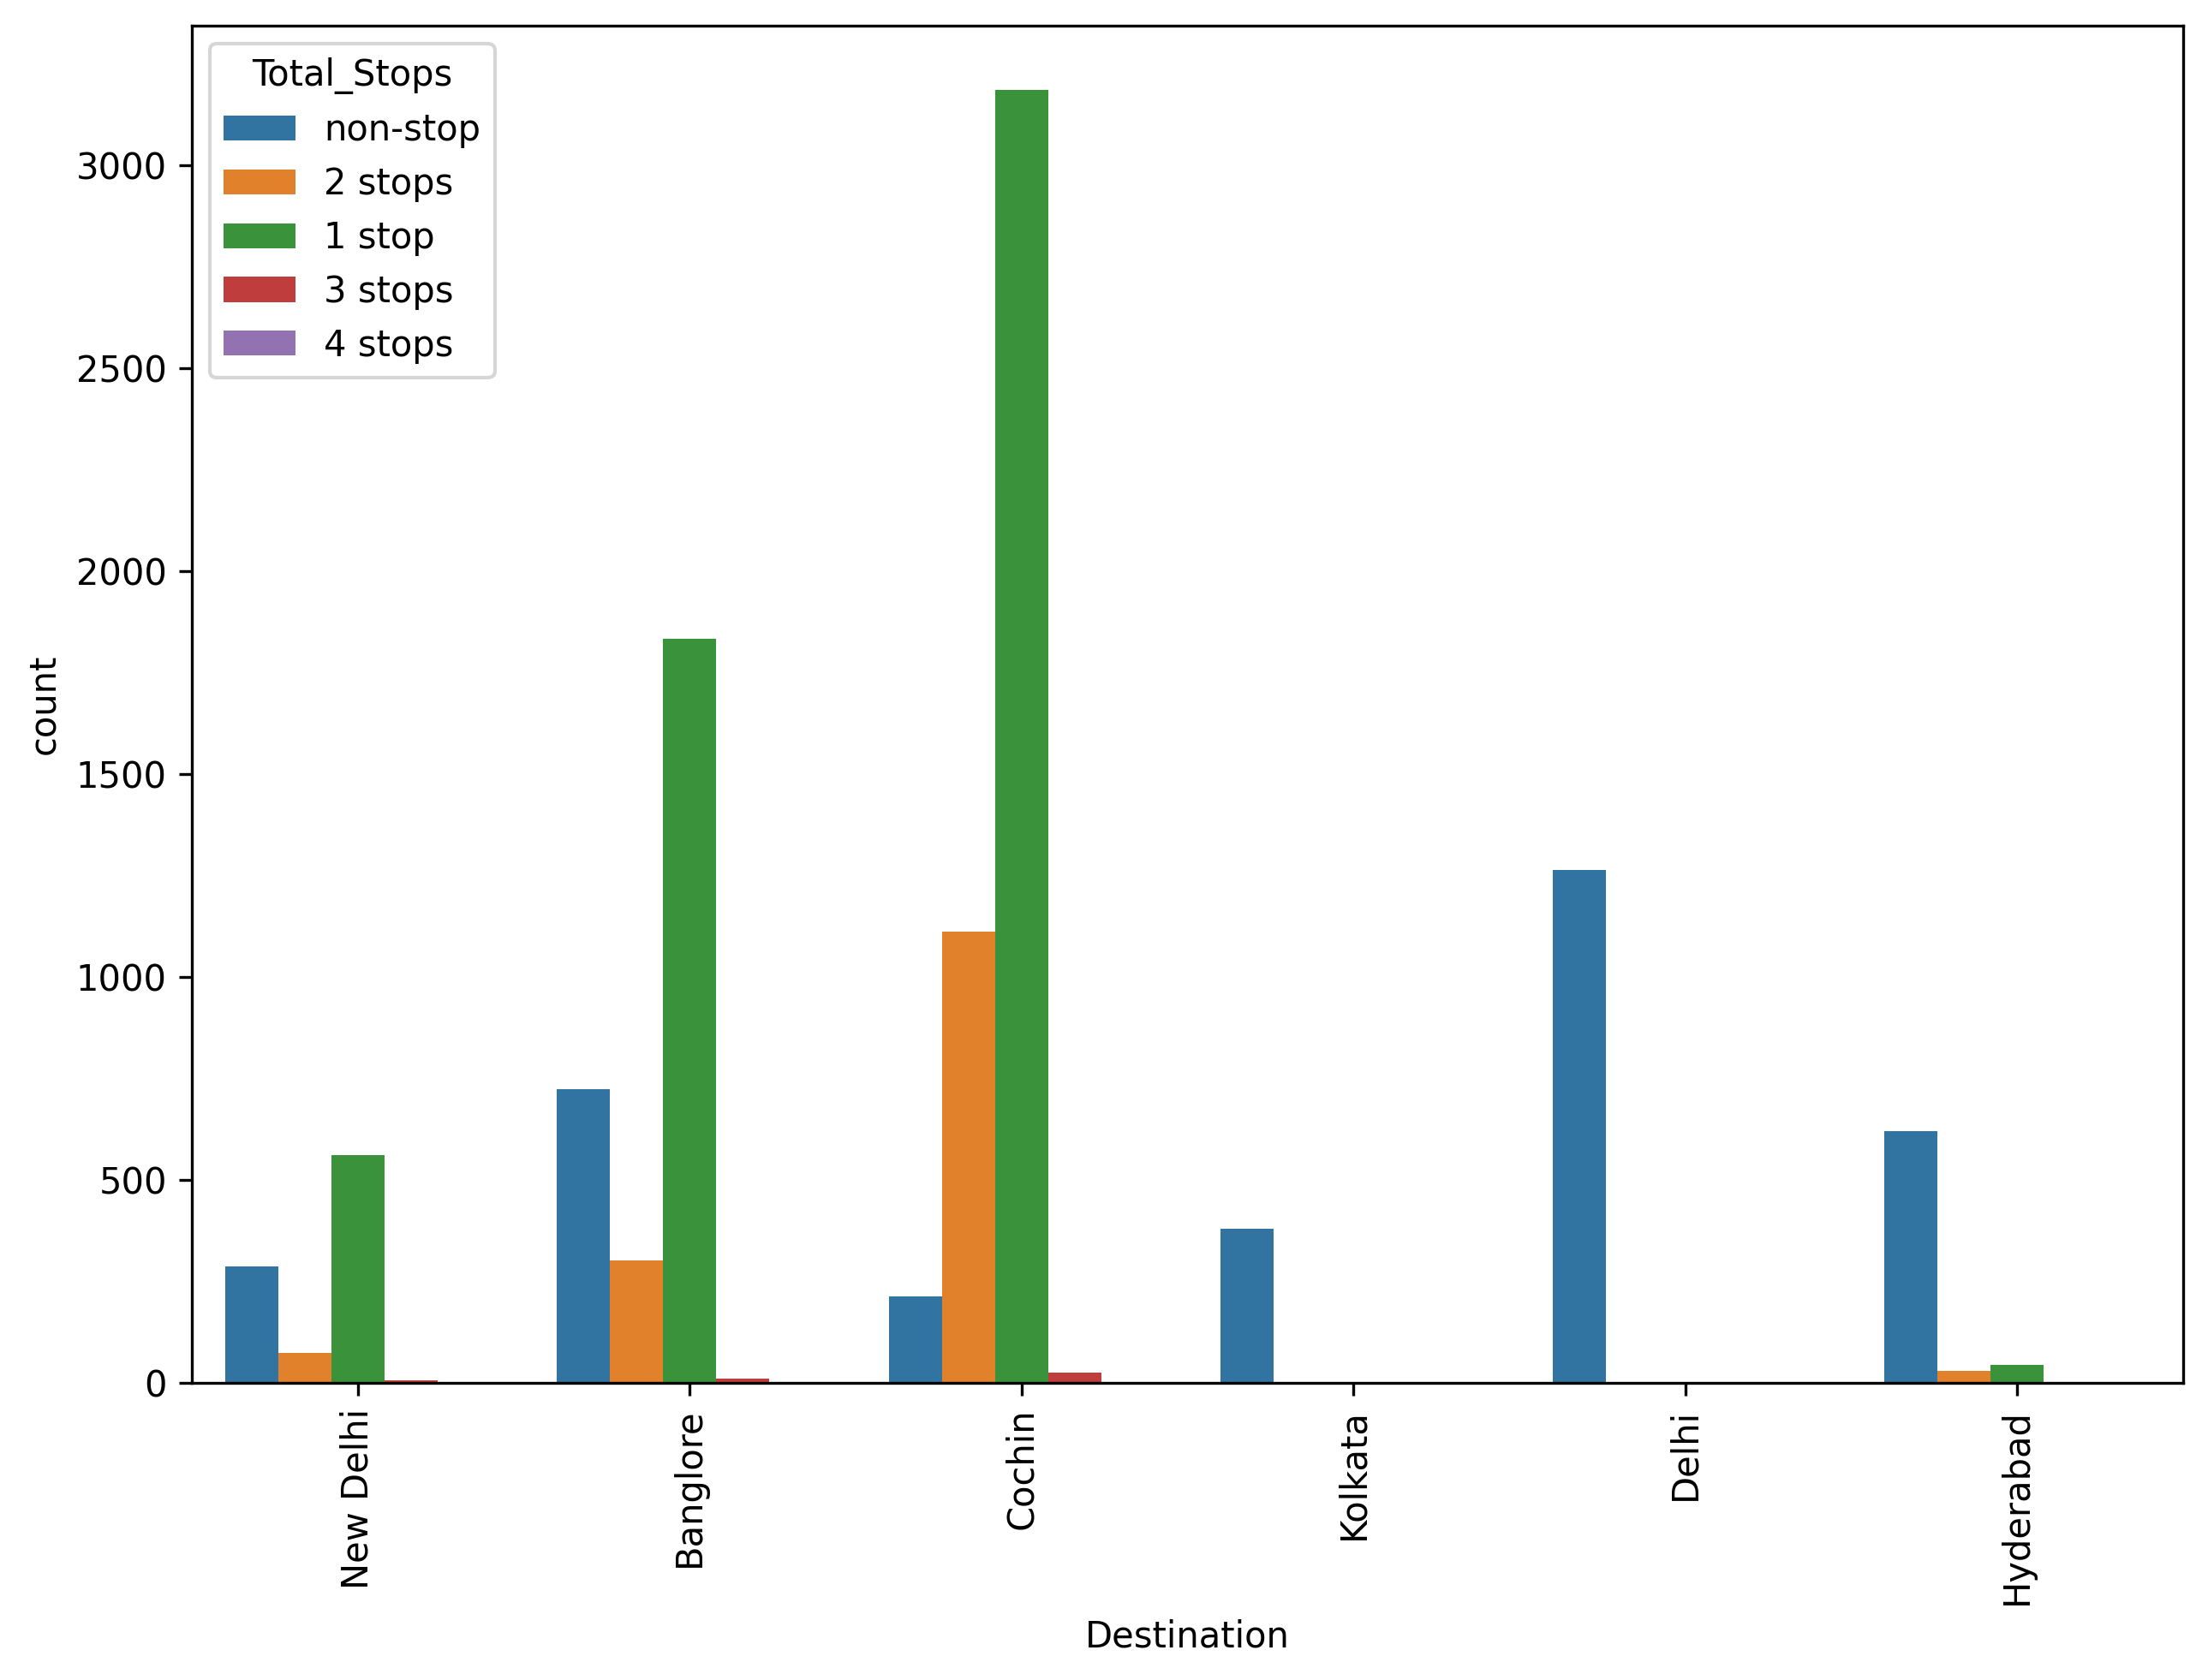

In [113]:
fig = plt.figure(figsize = (10,7), dpi = 300)
countplot_hue('Destination')

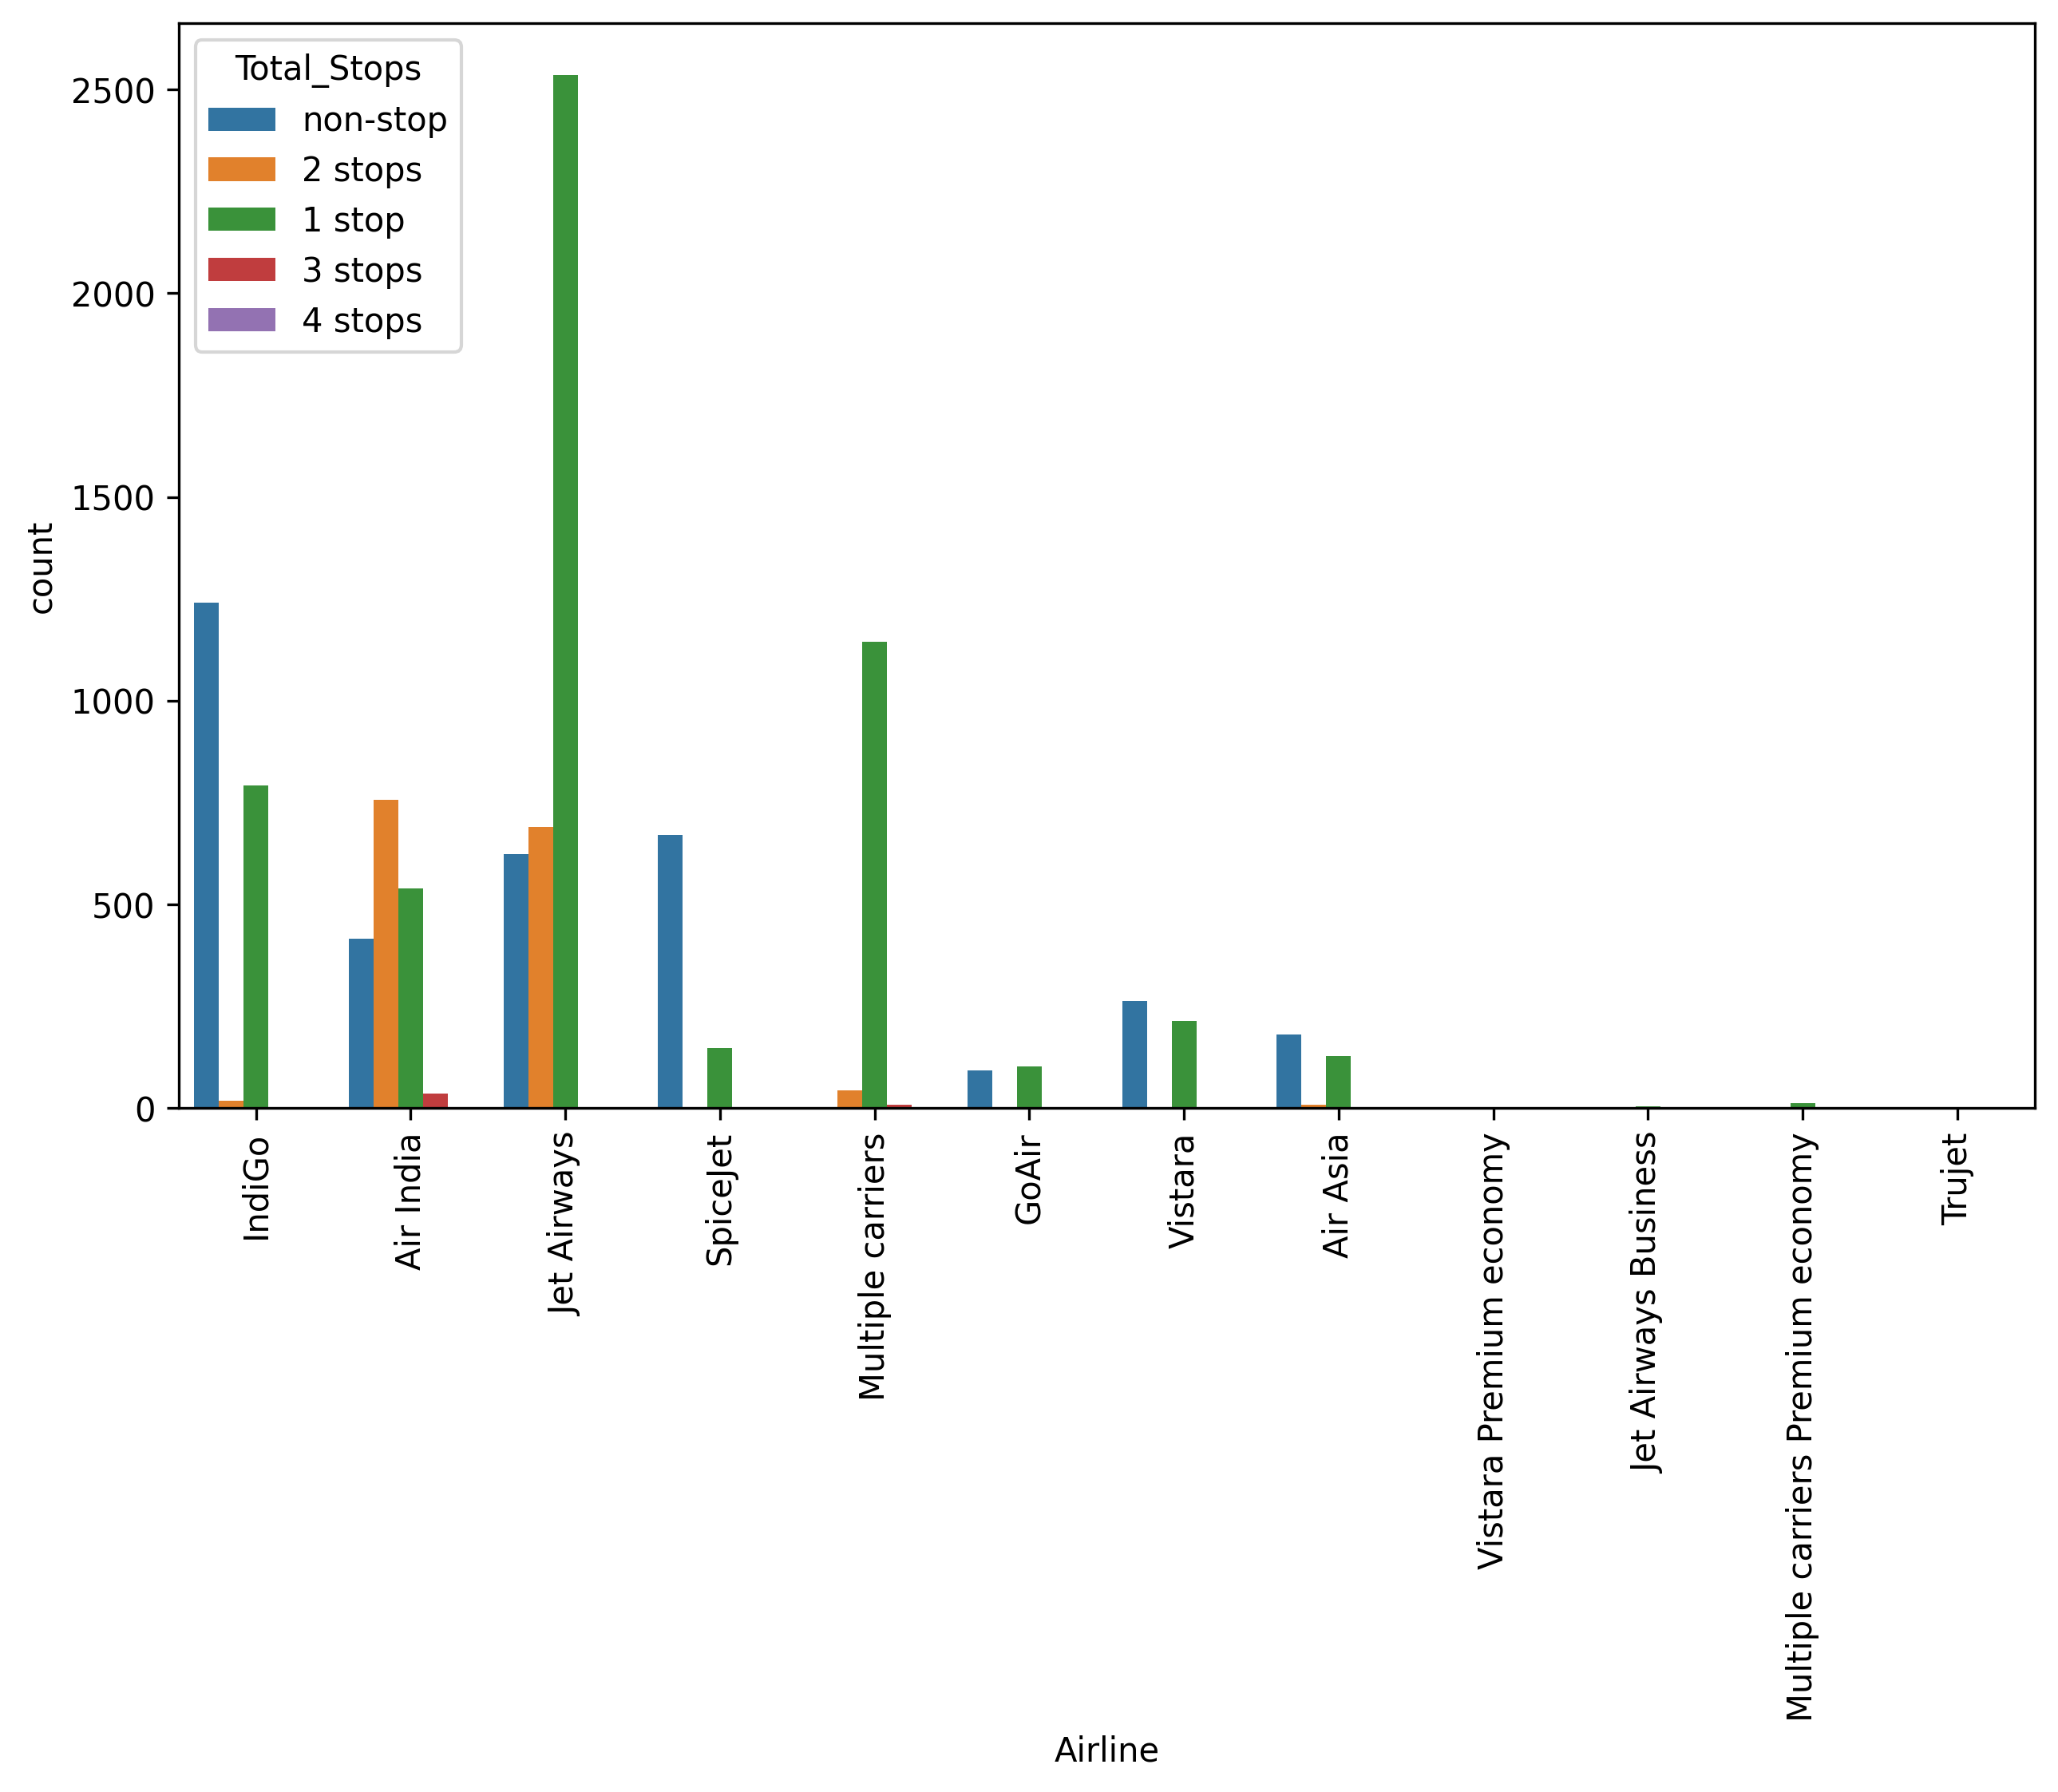

In [114]:
fig = plt.figure(figsize = (10,6), dpi = 300)
countplot_hue('Airline')

### We observe that:
* 1. Most of the Jet Airways flights have 1 stop between the source and destination and also having the most number of operational flights.
* 2. Indigo, Spicejet, Vistara and Air Asia have more non stop flights than 1 stop.
* 3. Flights to Cochin, Bangalore and New Delhi generally have 1 stop between them.
* 4. Flights to Kolkata, Delhi have no stops in between.
* 5. Delhi and Cochin seems to be the most busiest air destination.

In [115]:
def boxplot(x,y):
    fig = plt.figure(figsize = (15,15), dpi = 300)
    ax=sns.boxplot(x=df[x],y=df[y],data=df,hue='Total_Stops');
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

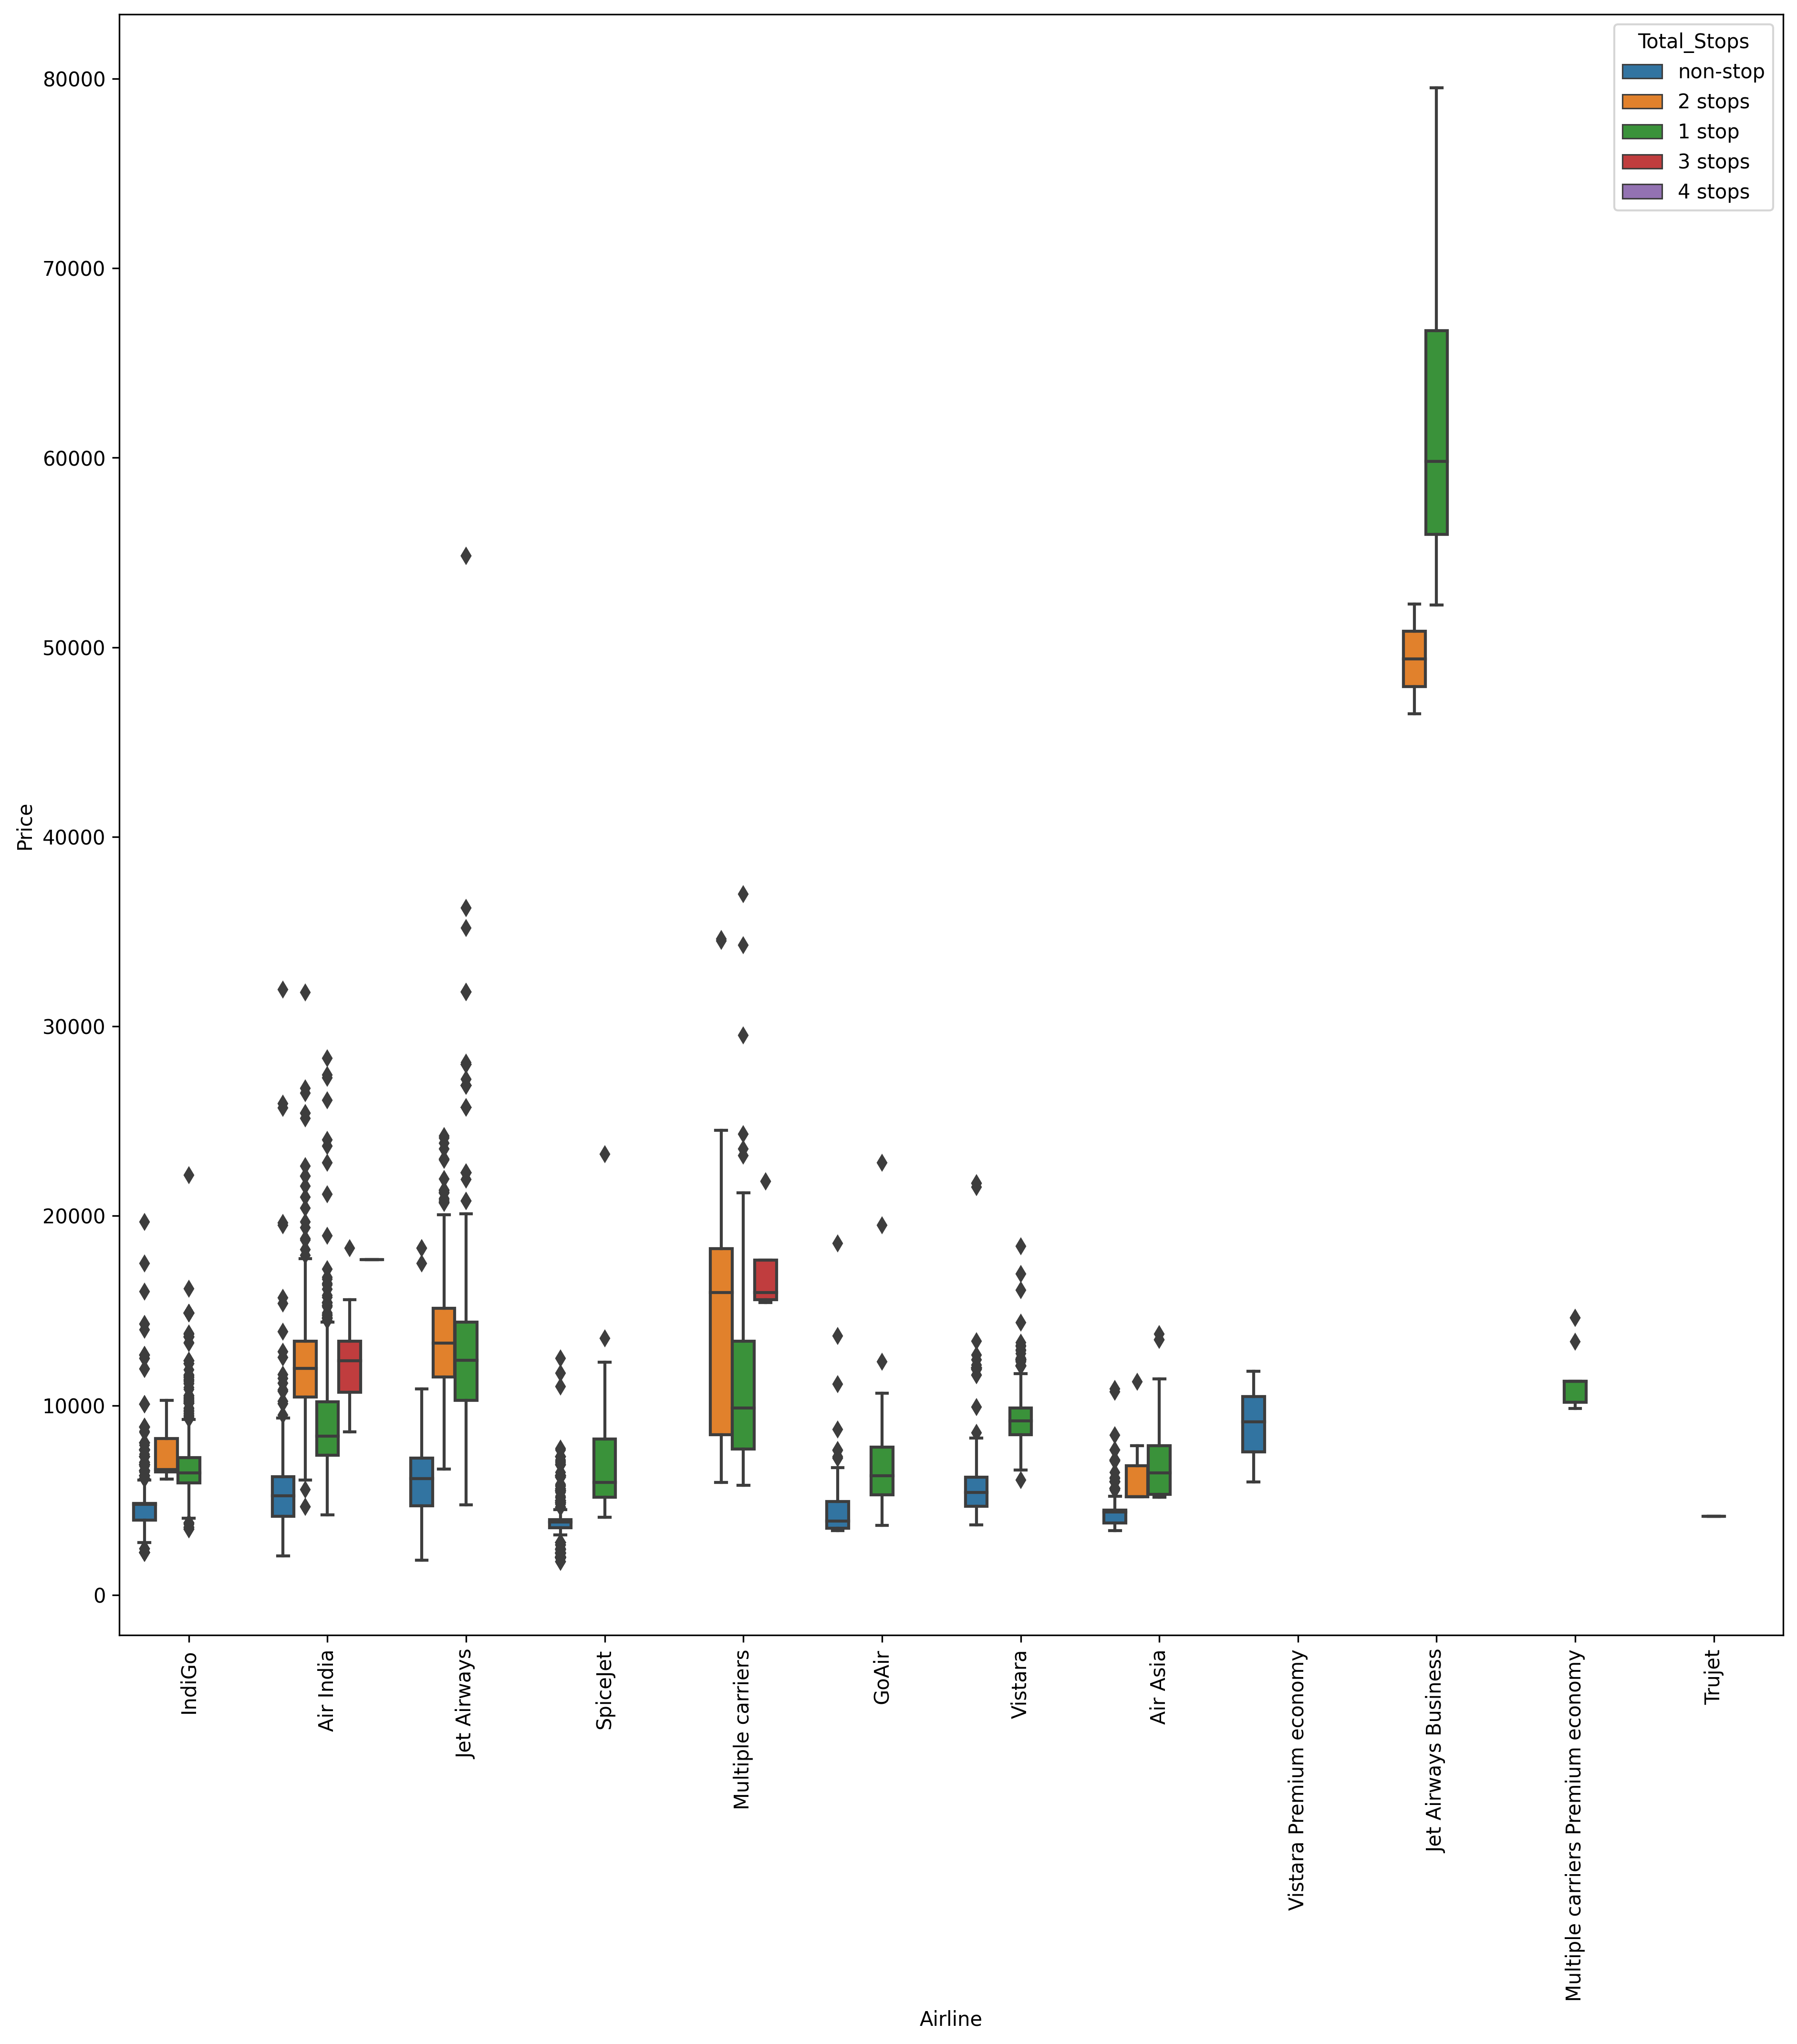

In [116]:
boxplot('Airline','Price')

### We observe that:
* 1. Air India,Jet Airways ,Multiple carriers flights having 1-3 stops are the most expensive flights

* 2. IndiGo, Air Asia have the most cheapest flights with 1-3 stops.

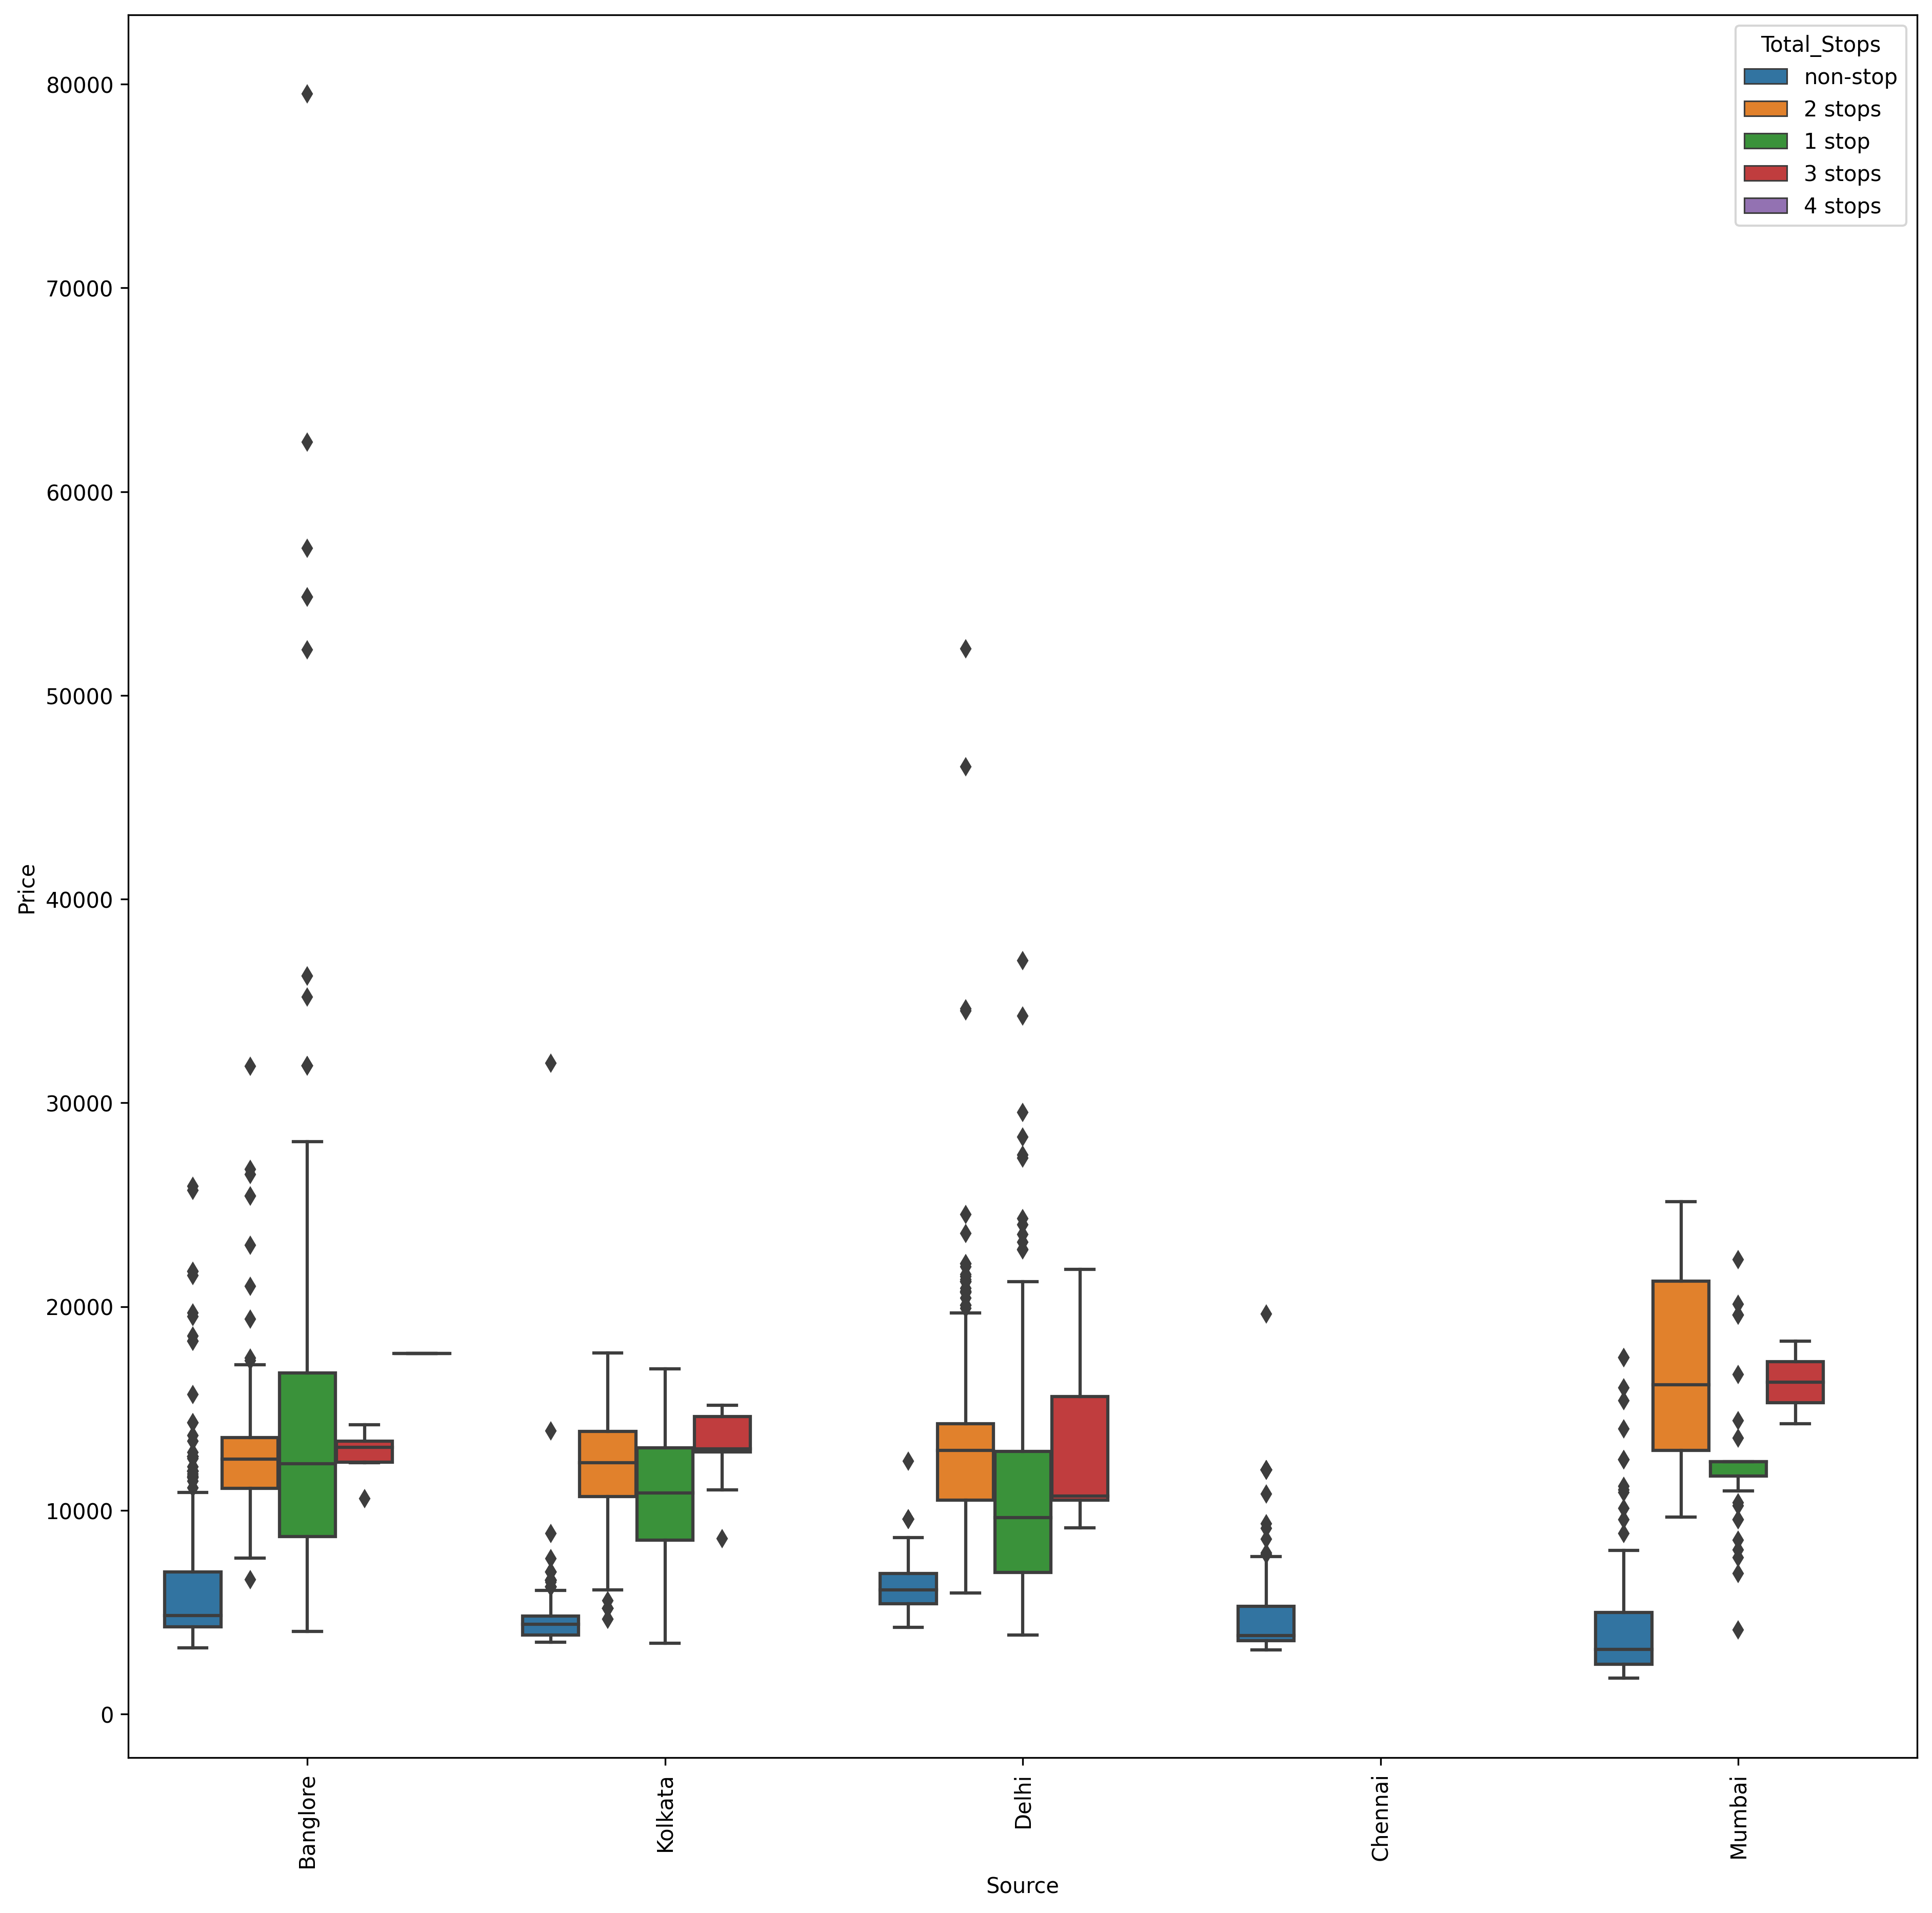

In [117]:
boxplot('Source','Price')

### We observe that:
* 1. Two and Three stops Flights from Mumbai are the most expensive whereas only no stop flights fly from chennai

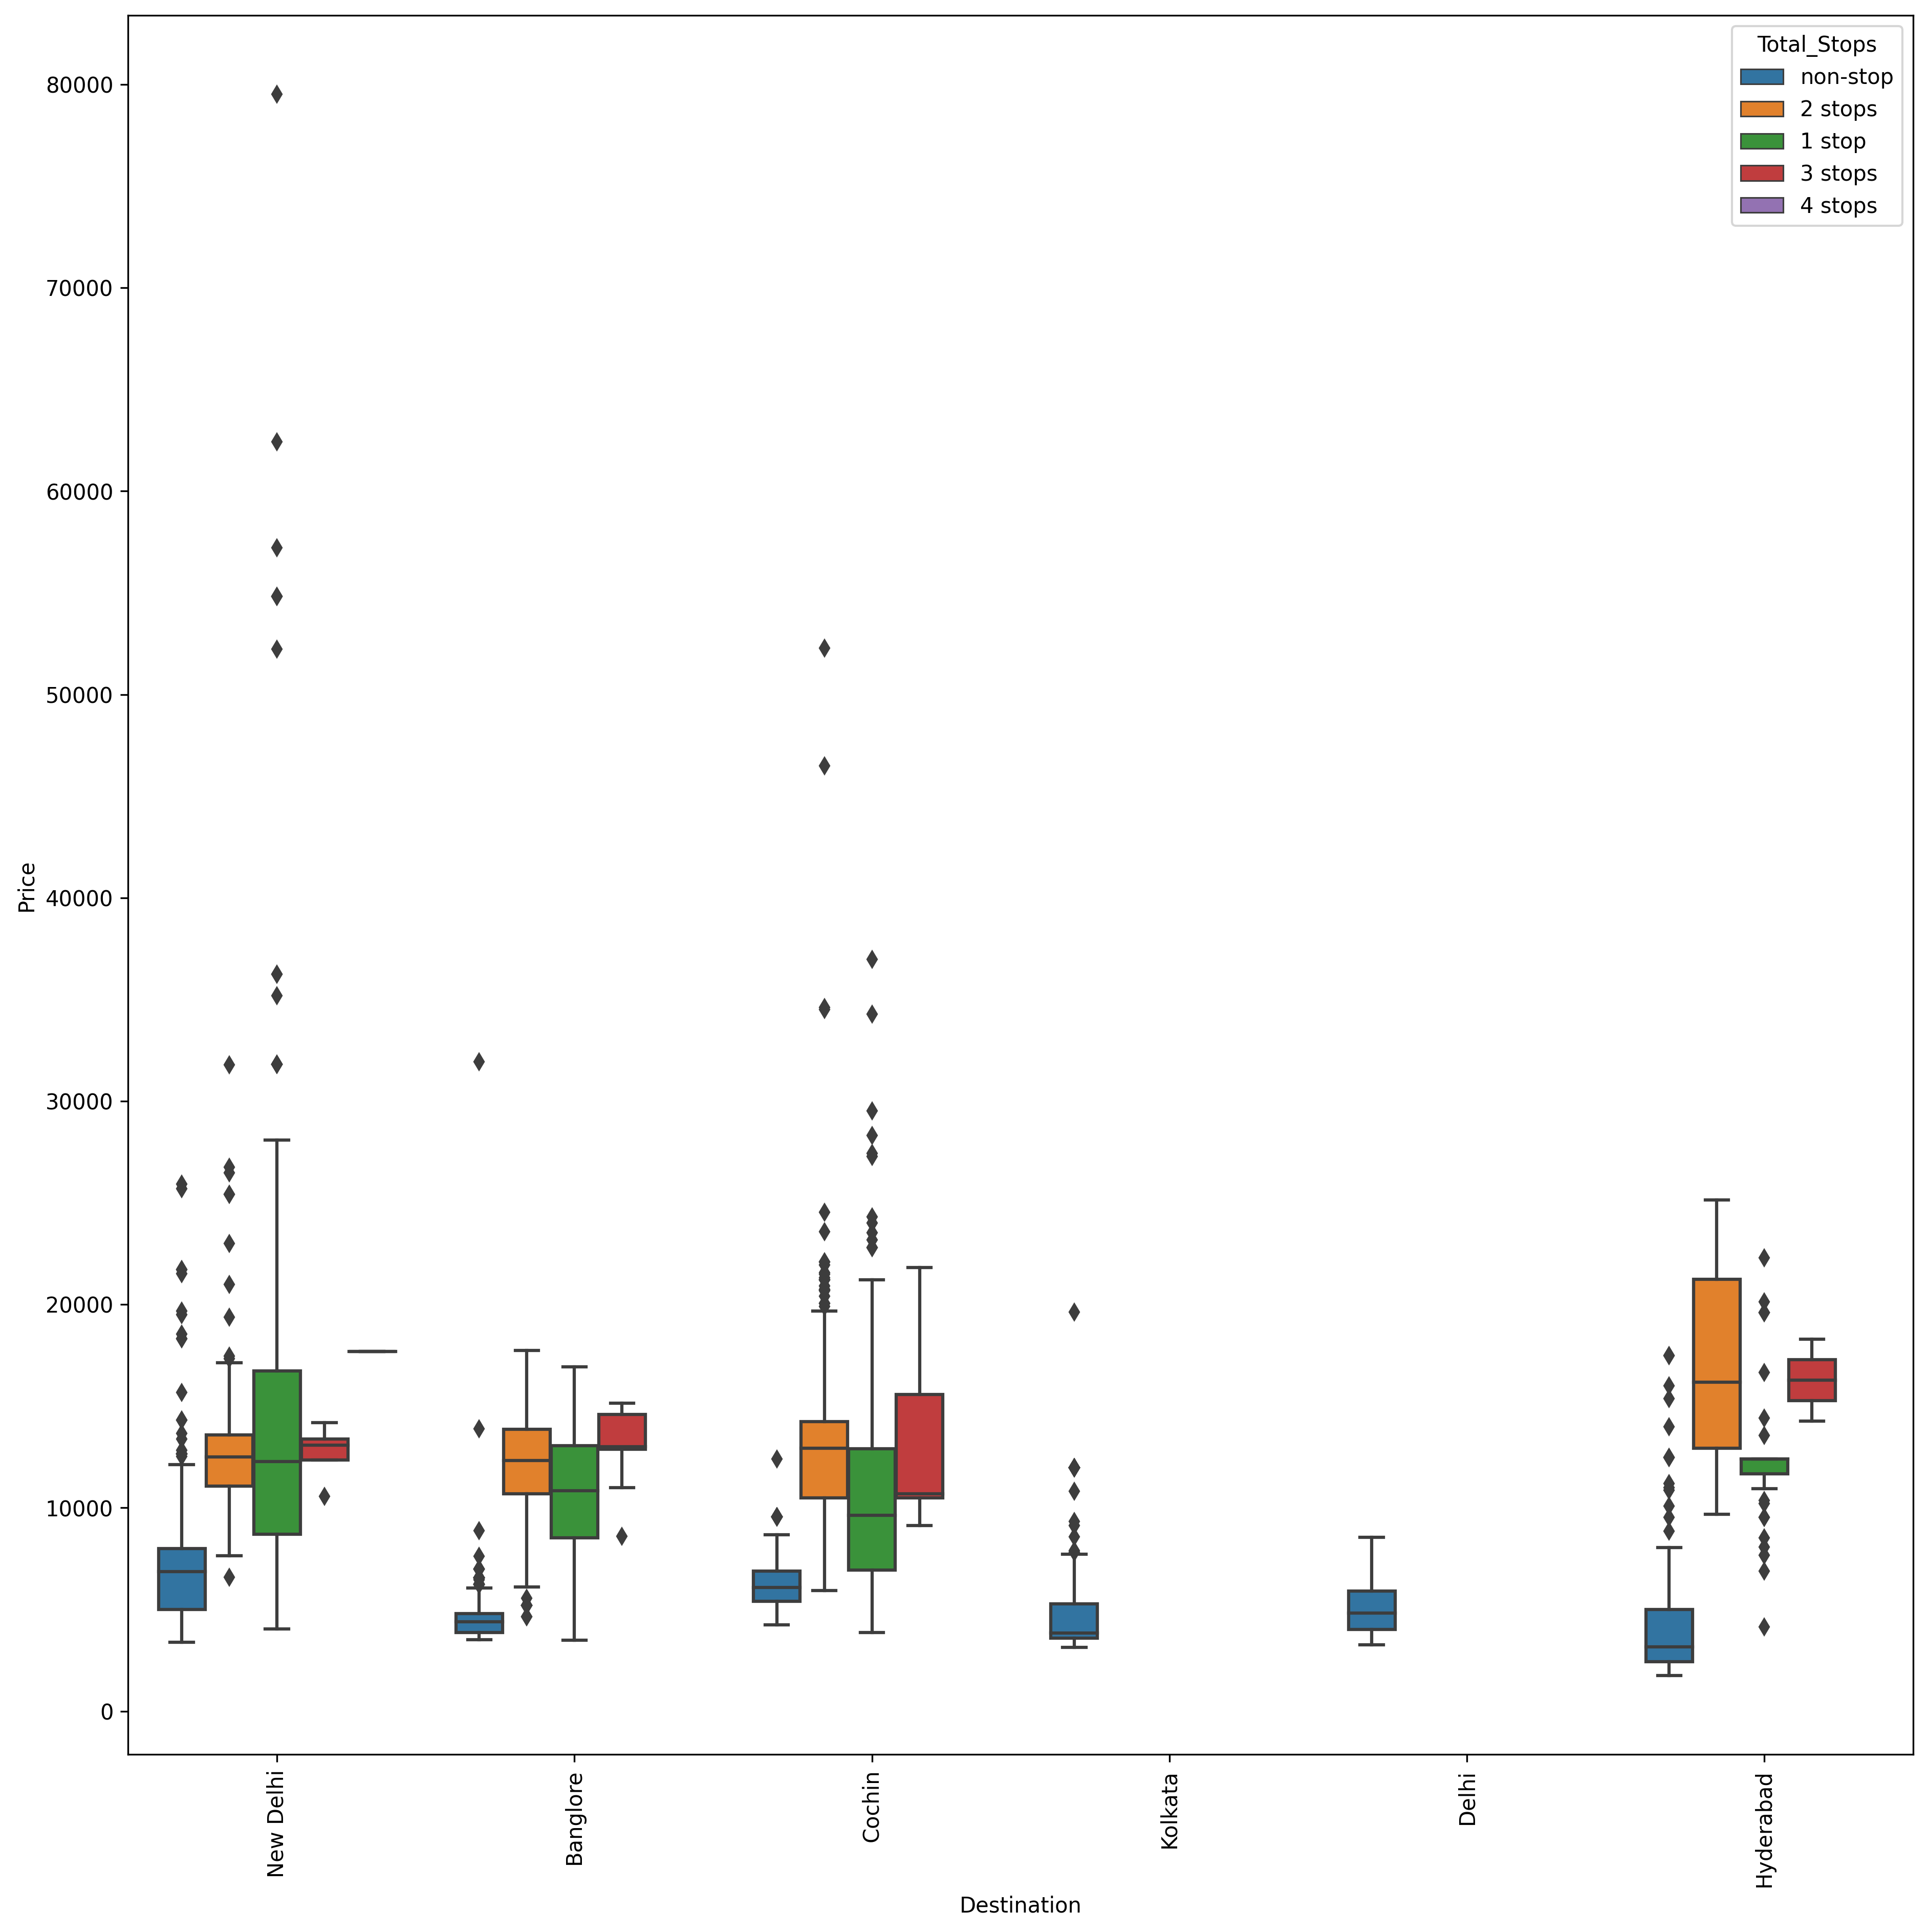

In [118]:
boxplot('Destination','Price')

### We observe that:
* 1. Two and three Stops flights to Hyderabad are the most expensive better option is no stop flights coz it is cheapest among all.

* 2. Only direct flights are present from Source to Kolkata and Delhi

### Date Time Data

In [119]:
season = df[['Date_of_Journey','Price']]


In [120]:
season["Month"]=pd.to_datetime(season['Date_of_Journey'],format="%d/%m/%Y").dt.month

/var/folders/vy/rtwz0d814x38zqk8ps7789qm0000gn/T/ipykernel_59096/1352944560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season["Month"]=pd.to_datetime(season['Date_of_Journey'],format="%d/%m/%Y").dt.month


In [121]:
season.drop(['Date_of_Journey'],axis=1,inplace=True)
season=season.set_index('Month')
season


/var/folders/vy/rtwz0d814x38zqk8ps7789qm0000gn/T/ipykernel_59096/1780287822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season.drop(['Date_of_Journey'],axis=1,inplace=True)


,Price
Month,
3,3897
5,7662
6,13882
5,6218
3,13302
...,...
4,4107
4,4145
4,7229


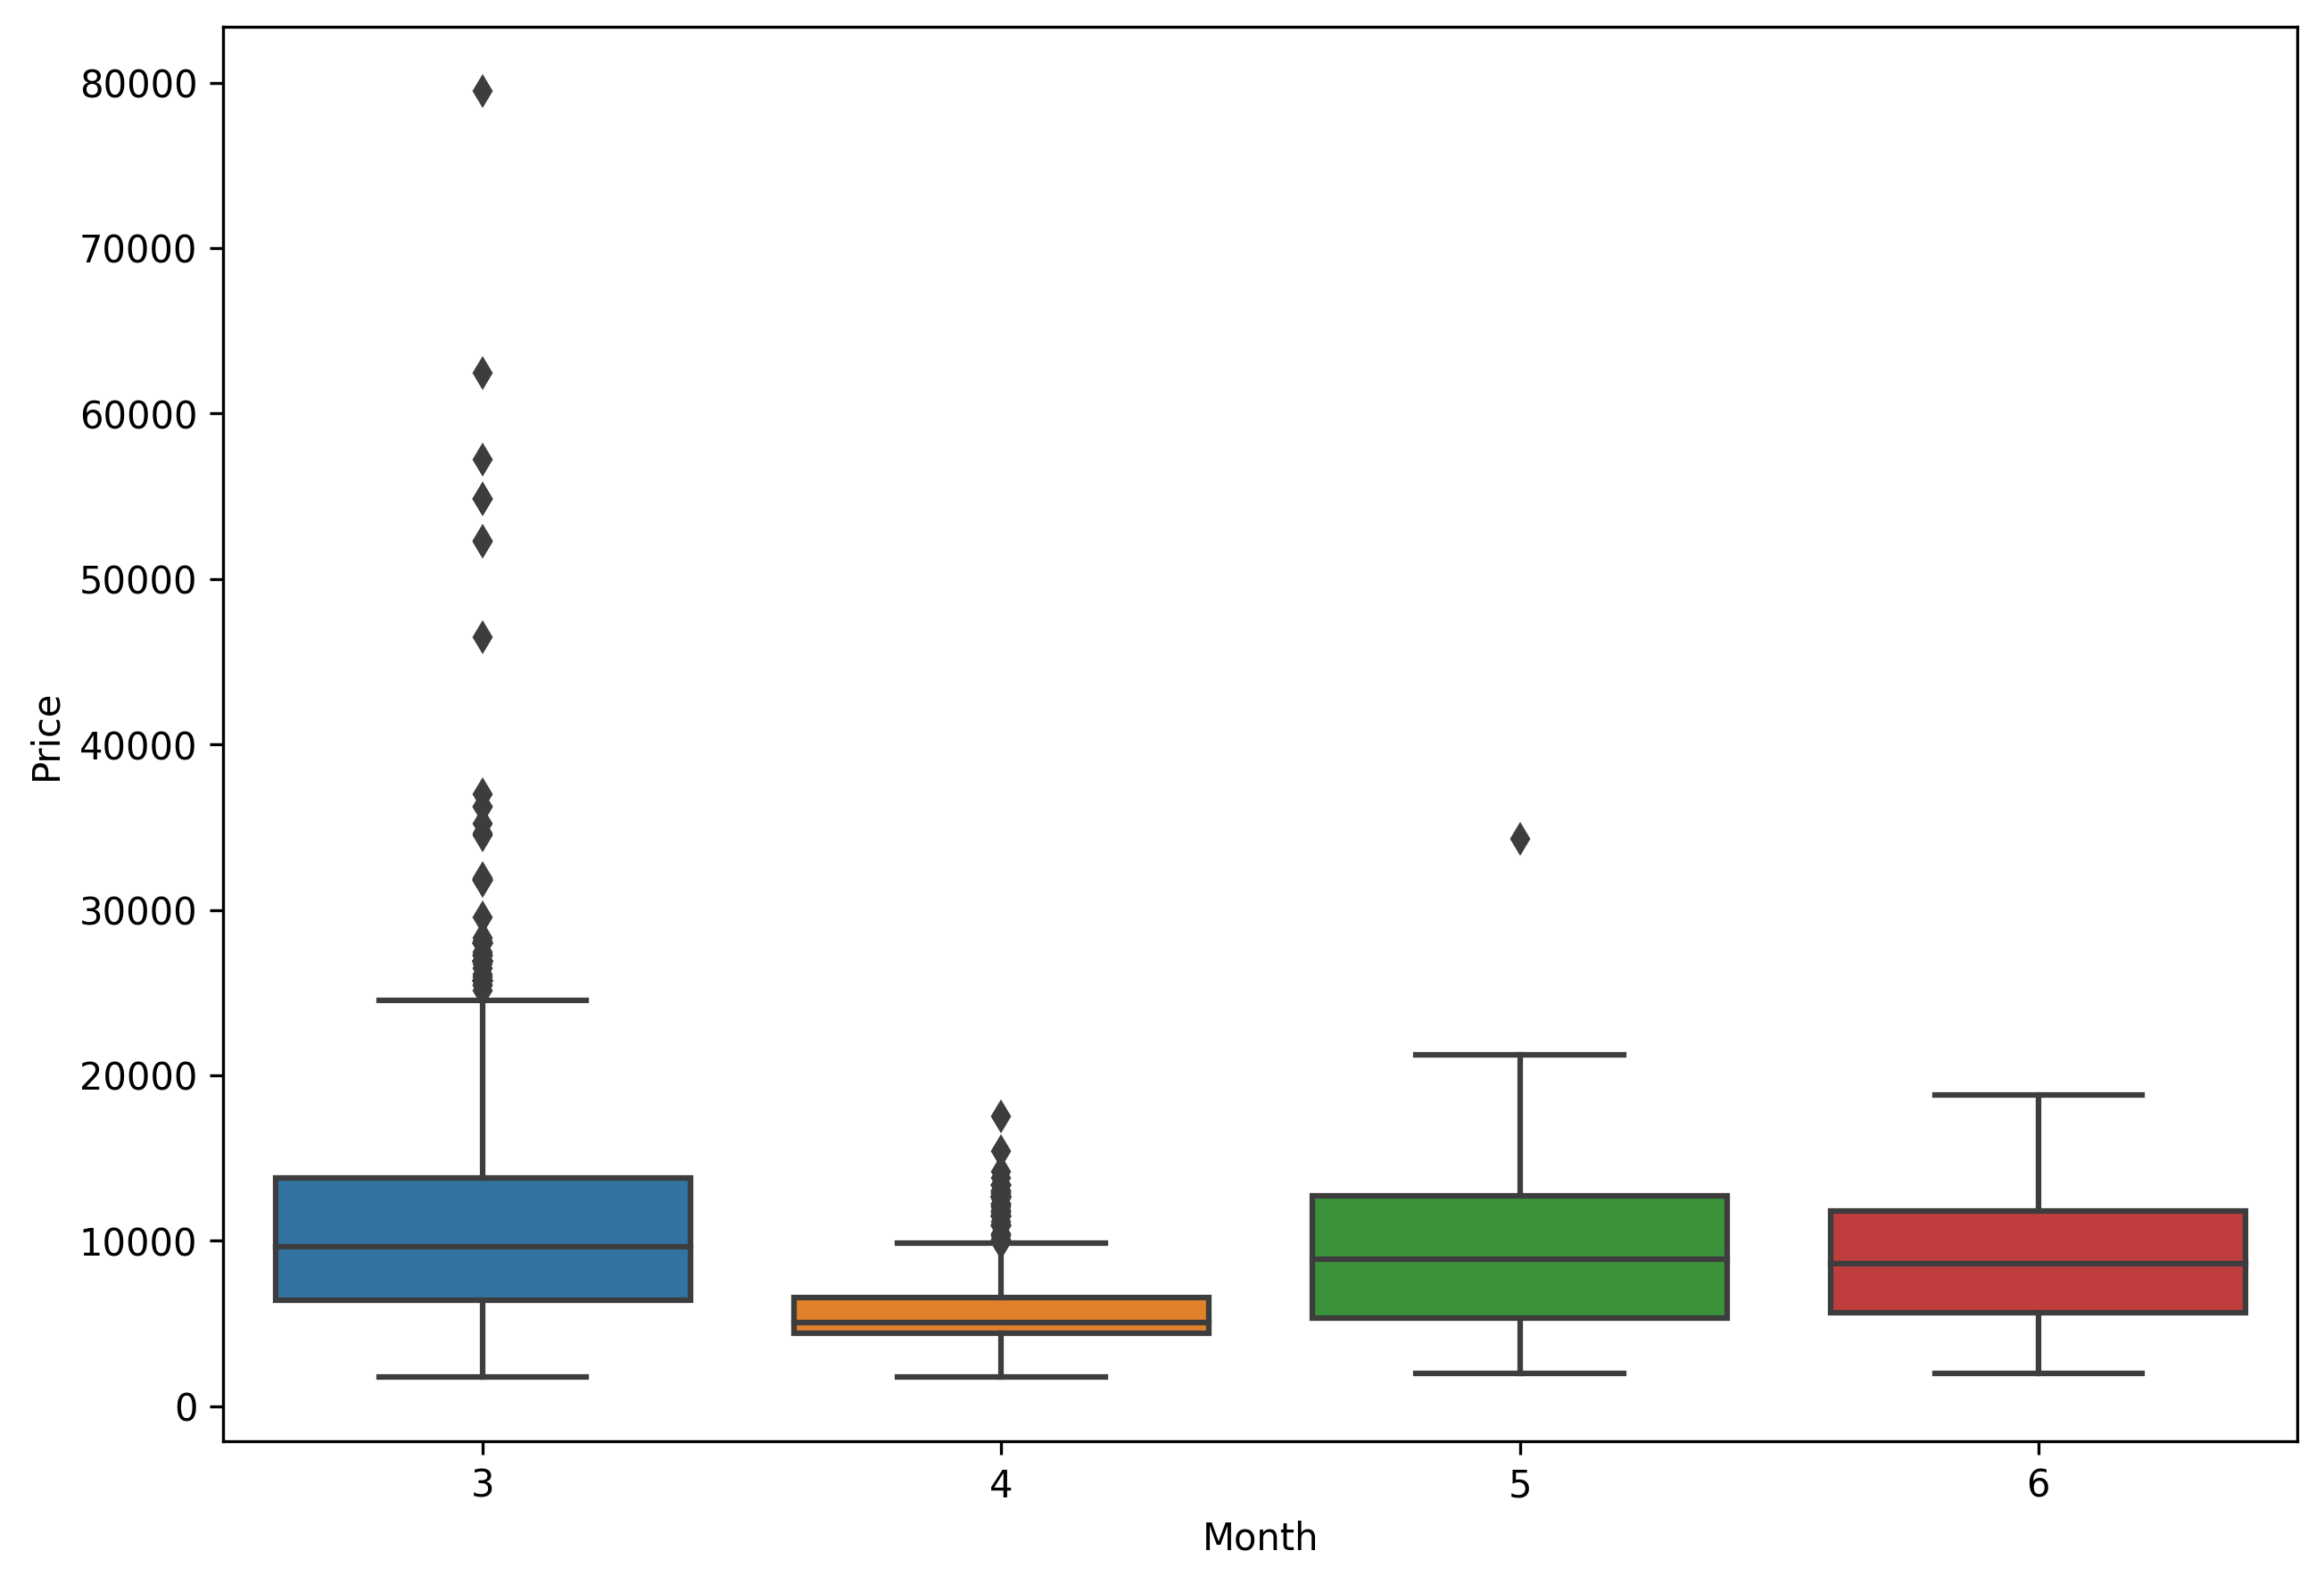

In [122]:
fig = plt.figure(figsize = (10,7), dpi = 300)
sns.boxplot(x=season.index,y='Price',data=season);

### We observe that:
* 1. Flight Fares in the month of april are little cheaper that other months.

### Numerical Data

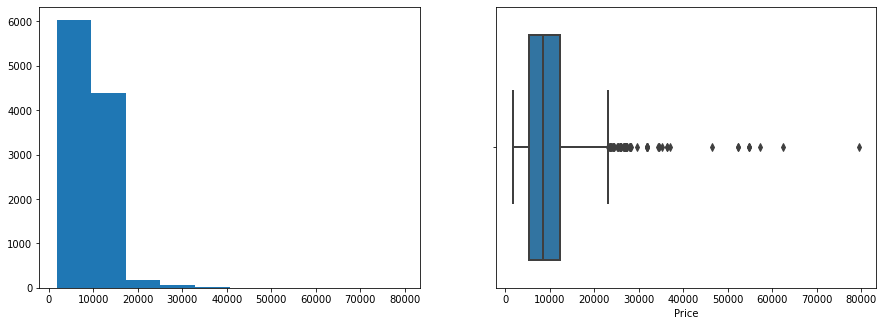

In [123]:
fig=plt.figure(1, (15, 30))
plt.subplot(5,2,1)
plt.hist(df['Price'])
plt.subplot(5,2,2)
sns.boxplot(x=df['Price'],orient='h',linewidth=2);

### We observe that:
* 1. Most of the price to travel in the range 5000 to 15000 with few outliers on the higher range.